# Tumor Detection

## Introduction
1. Machine learning is not uncommon to find in the medical field since trained models help identify hidden patterns.
1. The objective of this project is to compare a Convolutional Neural Network (CNN) architecture, a Fully Connected Neural Network (FCNN) architecture, and a CNN using Transfer Learning to classify kidney tumors.

## Background
1. There is limited data due to privacy concerns which makes it important to build efficient and accurate models based on the data we have.
1. Traditional machine learning rely on handcrafted features and using images would be more effective.
1. Transfer learning can help identify medical conditions by using a source that is similar to the target domain, and it reduces the need to train new models for different tasks (i.e. Brain Tumor Detection model & Kidney Tumor Detection model).

## Objective
1. Compare the performance of CNNs, FCNNs, and a Transfer Learning CNN.
1. CNNS and FCNNS are common approaches to image classification. However they require retraining to make accurate classifications on differring source and target domains.



# Convolutional Neural Network - CNN

Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
import cv2

KeyboardInterrupt: 

Clone dataset

In [ ]:
!git clone https://github.com/richweich/CS4210Project.git /content/CS4210Project
!ls

Cloning into '/content/CS4210Project'...
remote: Enumerating objects: 731, done.
remote: Counting objects: 100% (731/731), done.
remote: Compressing objects: 100% (729/729), done.
remote: Total 731 (delta 2), reused 731 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (731/731), 11.98 MiB | 9.07 MiB/s, done.
Resolving deltas: 100% (2/2), done.
CS4210Project  sample_data


Functions for loading data, assign values to healthy brains and tumors, and showing images

In [ ]:
def load_images_from_folder(folder, label, image_size):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

def load_data(base_dir, image_size, benign, malignant):
    healthy_images, healthy_labels = load_images_from_folder(os.path.join(base_dir, benign), label=0, image_size=image_size)
    tumor_images, tumor_labels = load_images_from_folder(os.path.join(base_dir, malignant), label=1, image_size=image_size)
    print(f"Loaded {len(healthy_images)} healthy images and {len(tumor_images)} tumor images.")

    images = np.concatenate((healthy_images, tumor_images), axis=0)
    labels = np.concatenate((healthy_labels, tumor_labels), axis=0)
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

Set base directory

In [ ]:
base_dir = "/content/CS4210Project"

Resize images and normalize pixel values

Loaded 408 healthy images and 392 tumor images.


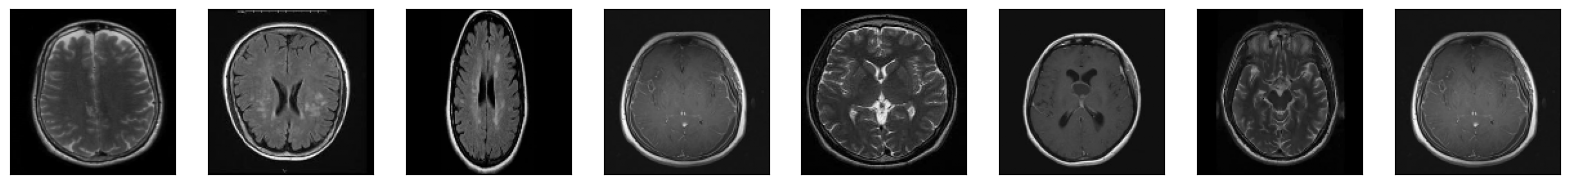

In [ ]:
image_size = 128
images, labels = load_data(base_dir, image_size, 'healthy', 'tumor')
show_images(images)
images = images / 255.0

Split into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.5, random_state=123)

Create convolutional neural network

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile CNN model for training

In [ ]:
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Perform data augmentation

In [ ]:
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(X_train)

Fit and train model

In [ ]:
cnn_model_fit = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6005 - loss: 0.7265 - val_accuracy: 0.7950 - val_loss: 0.5369
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8055 - loss: 0.5492 - val_accuracy: 0.7475 - val_loss: 0.5457
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8027 - loss: 0.4974 - val_accuracy: 0.8400 - val_loss: 0.4231
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8437 - loss: 0.4633 - val_accuracy: 0.8700 - val_loss: 0.3766
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7854 - loss: 0.4768 - val_accuracy: 0.8725 - val_loss: 0.3668
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7982 - loss: 0.4309 - val_accuracy: 0.8875 - val_loss: 0.3311
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8471 - loss: 0.3841 - val_accuracy: 0.8950 - val_loss: 0.3101
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8894 - loss: 0.3629 - val_accuracy: 0.8825 - val_loss: 0.3136
Epo

In [ ]:
cnn_model_fit.history

{'accuracy': [0.6524999737739563,
  0.7774999737739563,
  0.7850000262260437,
  0.8374999761581421,
  0.8349999785423279,
  0.8149999976158142,
  0.8550000190734863,
  0.8824999928474426,
  0.8525000214576721,
  0.8700000047683716,
  0.862500011920929,
  0.8899999856948853,
  0.8700000047683716,
  0.8799999952316284,
  0.8675000071525574,
  0.8949999809265137,
  0.9024999737739563,
  0.8974999785423279,
  0.9125000238418579,
  0.8949999809265137],
 'loss': [0.6799985766410828,
  0.5415918231010437,
  0.48852765560150146,
  0.4377276301383972,
  0.41479483246803284,
  0.40902701020240784,
  0.354256808757782,
  0.34462857246398926,
  0.32543274760246277,
  0.33368241786956787,
  0.33803072571754456,
  0.2794482707977295,
  0.2910579442977905,
  0.31580135226249695,
  0.29458633065223694,
  0.3111041784286499,
  0.2552686333656311,
  0.24917718768119812,
  0.2233467996120453,
  0.21813726425170898],
 'val_accuracy': [0.7950000166893005,
  0.7475000023841858,
  0.8399999737739563,
  0.870

Test accuracy

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

13/13 - 3s - 251ms/step - accuracy: 0.9200 - loss: 0.2394
Test Accuracy: 92.00%


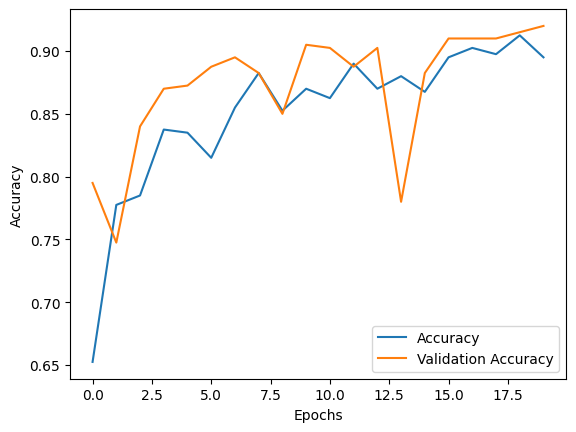

In [ ]:
plt.plot(cnn_model_fit.history['accuracy'], label='Accuracy')
plt.plot(cnn_model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

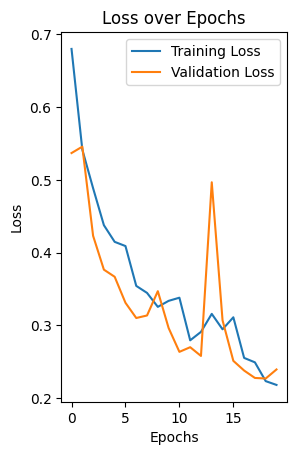

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(cnn_model_fit.history['loss'], label='Training Loss')
plt.plot(cnn_model_fit.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Fully Connected Neural Network - MLP

In [ ]:
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [ ]:
import keras as keras

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(image_size, image_size, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'],)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      25,166,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,330,689 (96.63 MB)

 Trainable params: 25,330,689 (96.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 426ms/step - accuracy: 0.4883 - loss: 11.9206 - val_accuracy: 0.4500 - val_loss: 4.6276
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 399ms/step - accuracy: 0.6010 - loss: 1.4940 - val_accuracy: 0.7375 - val_loss: 0.7944
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 597ms/step - accuracy: 0.6651 - loss: 0.7492 - val_accuracy: 0.4500 - val_loss: 0.8761
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 403ms/step - accuracy: 0.6873 - loss: 0.6627 - val_accuracy: 0.6625 - val_loss: 0.6730
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 499ms/step - accuracy: 0.6219 - loss: 0.7859 - val_accuracy: 0.7875 - val_loss: 0.5112
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 492ms/step - accuracy: 0.7776 - loss: 0.6696 - val_accuracy: 0.6250 - val_loss: 0.6374
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 449ms/step - accuracy: 0.6958 - loss: 0.5067 - val_accuracy: 0.8125 - val_loss: 0.5787
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 401ms/step - accuracy: 0.8065 - loss: 0.5223 - val_accuracy: 

In [ ]:
training.history

{'accuracy': [0.565625011920929,
  0.5625,
  0.65625,
  0.746874988079071,
  0.731249988079071,
  0.7718750238418579,
  0.6875,
  0.8531249761581421,
  0.793749988079071,
  0.746874988079071,
  0.8374999761581421,
  0.784375011920929,
  0.878125011920929,
  0.8687499761581421,
  0.8843749761581421,
  0.890625,
  0.903124988079071,
  0.9281250238418579,
  0.8843749761581421,
  0.828125],
 'loss': [7.722863674163818,
  2.253087282180786,
  1.2859727144241333,
  0.8472012281417847,
  0.6574832797050476,
  0.6195932626724243,
  0.7882689237594604,
  0.37925243377685547,
  0.5396435856819153,
  0.5312903523445129,
  0.3744722008705139,
  0.6133646965026855,
  0.31272944808006287,
  0.27318692207336426,
  0.2636603116989136,
  0.260810911655426,
  0.24158844351768494,
  0.2044745683670044,
  0.24437329173088074,
  0.45076680183410645],
 'val_accuracy': [0.824999988079071,
  0.7124999761581421,
  0.887499988079071,
  0.8500000238418579,
  0.7875000238418579,
  0.8999999761581421,
  0.625,
  0

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test loss: {results[0]:.4f}, Test accuracy: {results[1]*100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8444 - loss: 0.4468
Test loss: 0.4620, Test accuracy: 84.25%


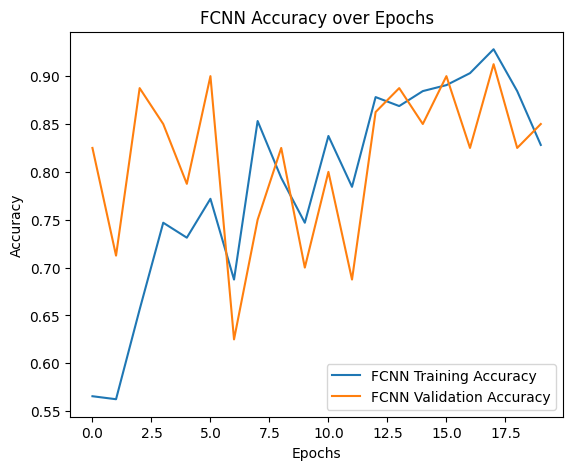

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(training.history['accuracy'], label='FCNN Training Accuracy')
plt.plot(training.history['val_accuracy'], label='FCNN Validation Accuracy')
plt.title('FCNN Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

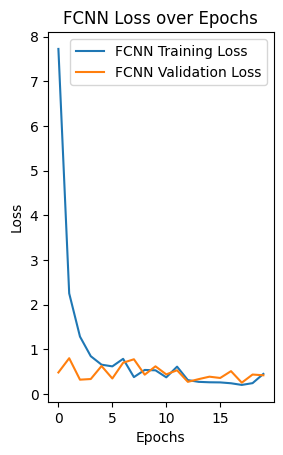

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(training.history['loss'], label='FCNN Training Loss')
plt.plot(training.history['val_loss'], label='FCNN Validation Loss')
plt.title('FCNN Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

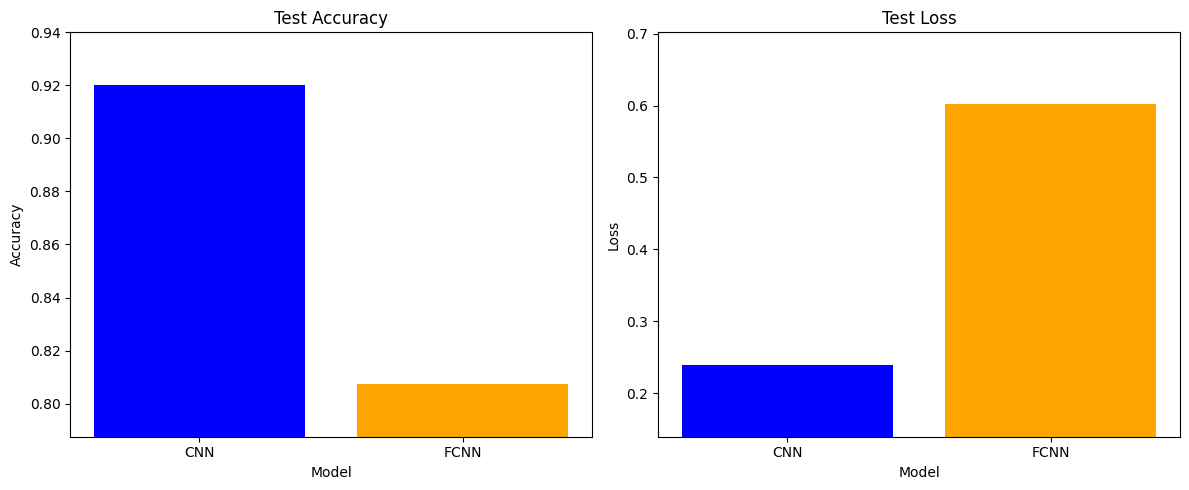

In [ ]:
cnn_test_accuracy = test_accuracy
cnn_test_loss = test_loss
fcnn_test_loss, fcnn_test_accuracy = results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

accuracy_range = (min(cnn_test_accuracy, fcnn_test_accuracy) - 0.02,
                  max(cnn_test_accuracy, fcnn_test_accuracy) + 0.02)

ax[0].bar(['CNN', 'FCNN'], [cnn_test_accuracy, fcnn_test_accuracy], color=['blue', 'orange'])
ax[0].set_ylim(accuracy_range)
ax[0].set_title('Test Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Model')


loss_range = (min(cnn_test_loss, fcnn_test_loss) - 0.1,
              max(cnn_test_loss, fcnn_test_loss) + 0.1)
ax[1].bar(['CNN', 'FCNN'], [cnn_test_loss, fcnn_test_loss], color=['blue', 'orange'])
ax[1].set_ylim(loss_range)
ax[1].set_title('Test Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Model')

plt.tight_layout()
plt.show()

CNN Misclassified Images:
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 528ms/step


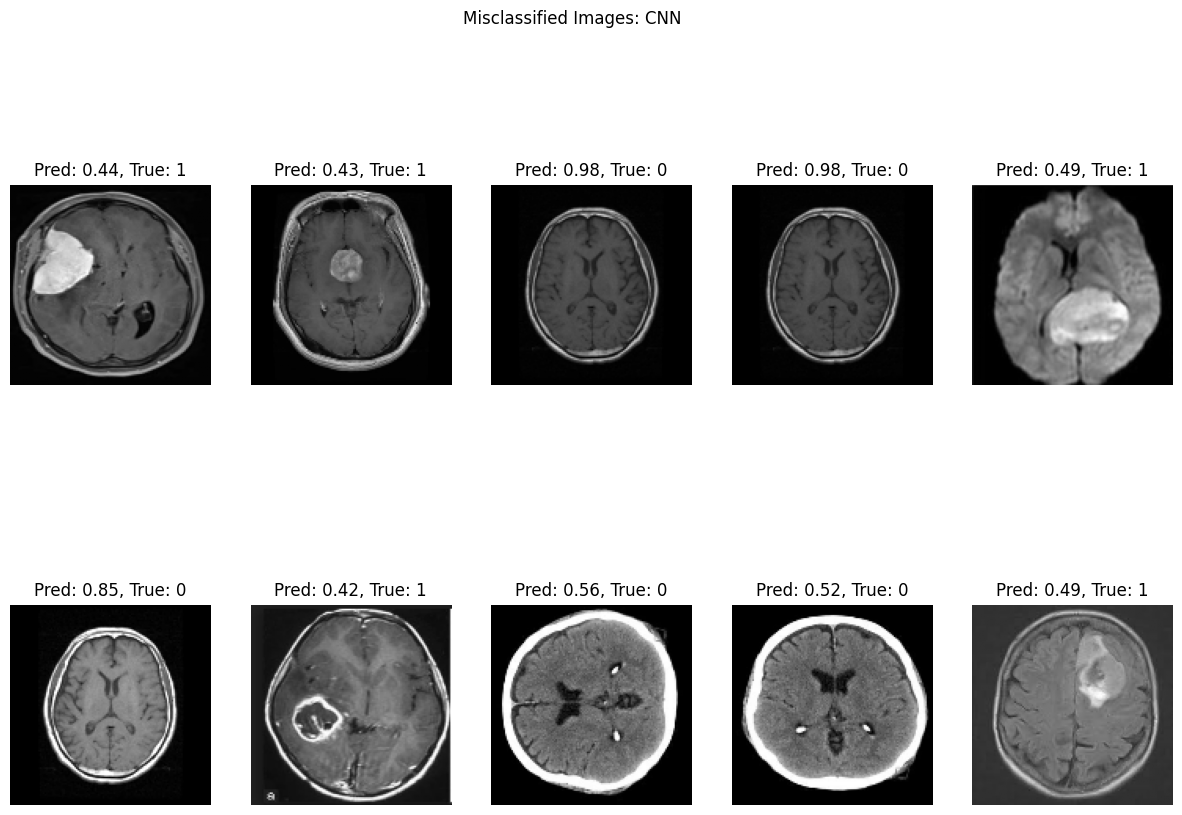

FCNN Misclassified Images:
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


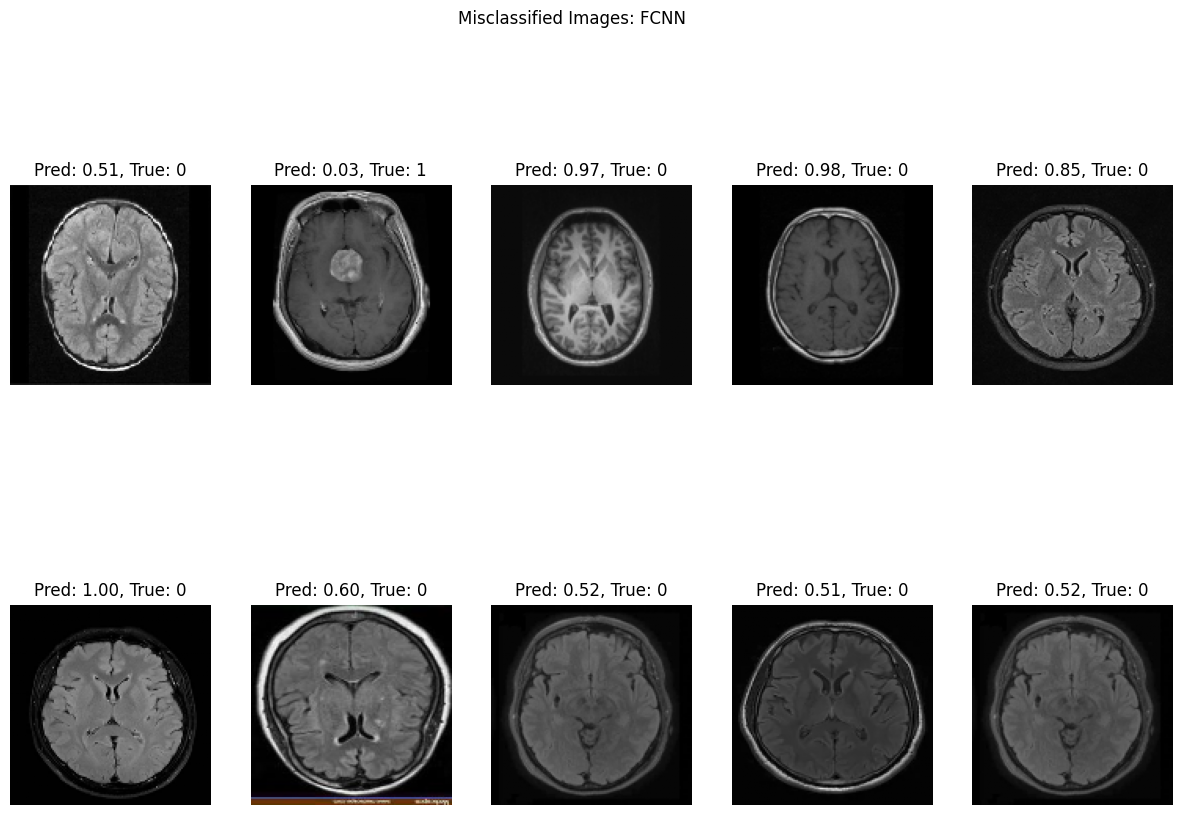

In [ ]:
def display_misclassified(model, X, y, model_name, n=10):
    predictions = model.predict(X).flatten()
    misclassified_idx = np.where((predictions > 0.5) != y)[0]

    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(misclassified_idx[:n]):
        plt.subplot(2, n // 2, i + 1)
        plt.imshow(X[idx])
        plt.title(f'Pred: {predictions[idx]:.2f}, True: {y[idx]}')
        plt.axis('off')
    plt.suptitle(f'Misclassified Images: {model_name}')
    plt.show()

print("CNN Misclassified Images:")
display_misclassified(cnn_model, X_test, y_test, "CNN", n=10)

print("FCNN Misclassified Images:")
display_misclassified(model, X_test, y_test, "FCNN", n=10)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 267ms/step


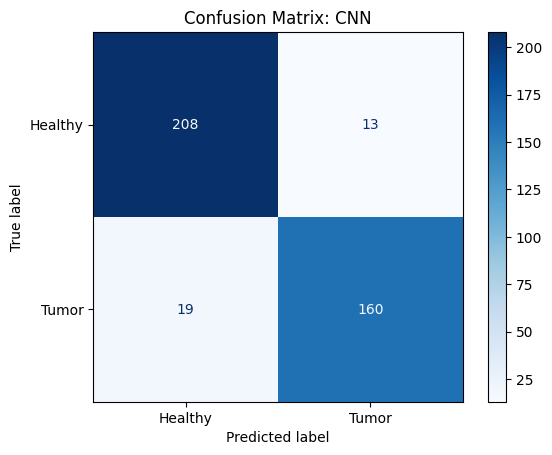

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


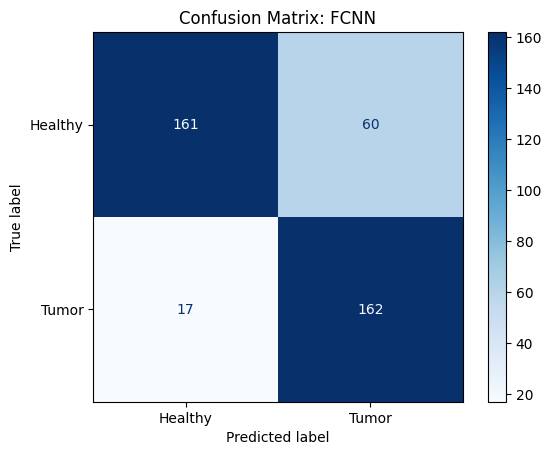

In [ ]:
def plot_confusion_matrix(model, X, y, model_name):
    predictions = (model.predict(X).flatten() > 0.5).astype(int)
    cm = confusion_matrix(y, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Tumor'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Confusion Matrix for CNN
plot_confusion_matrix(cnn_model, X_test, y_test, "CNN")

# Confusion Matrix for FCNN
plot_confusion_matrix(model, X_test, y_test, "FCNN")

# Transfer Learning

Clone Kidney Tumor Dataset

In [ ]:
!git clone https://github.com/vincent-24/KidneyTumorDataset.git /content/KidneyTumorDataset
!ls

fatal: destination path '/content/KidneyTumorDataset' already exists and is not an empty directory.
CS4210Project  KidneyTumorDataset  sample_data


Set base directory

In [ ]:
base_dir = "/content/KidneyTumorDataset"

Load the VGG19 (Visual Geometry Group) model from Keras
* VGG19 is a pre-trained ImageNet dataset
* Useful for extracting features and adding custom layers for binary classification

In [ ]:
# Load VGG19 model
# include_top=False removes the classification layer on which the VGG19 model was trained on
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Model is not trainable
base_model.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Adding layers for our specific problem

In [ ]:
tl_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),       # Reduce feature maps to single vector per channel
    Dense(256, activation='relu'),
    Dropout(0.5),                   # Reduce overfitting
    Dense(1, activation='sigmoid')  # Output for binary classification
])

Compile and fit the model

In [ ]:
tl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = tl_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=3, validation_data=(X_test, y_test))

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 210s 17s/step - accuracy: 0.5392 - loss: 0.7462 - val_accuracy: 0.8150 - val_loss: 0.5540
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 299s 20s/step - accuracy: 0.7150 - loss: 0.5734 - val_accuracy: 0.8575 - val_loss: 0.4726
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 265s 20s/step - accuracy: 0.8137 - loss: 0.4980 - val_accuracy: 0.8550 - val_loss: 0.4139


Test accuracy for Brain Tumor Detection

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Brain Tumor Detection Test Accuracy: {test_accuracy * 100:.2f}%")

13/13 - 0s - 31ms/step - accuracy: 0.8075 - loss: 0.6018
Brain Tumor Detection Test Accuracy: 80.75%


Load and display images of Kidney Tumors

Loaded 497 healthy images and 397 tumor images.


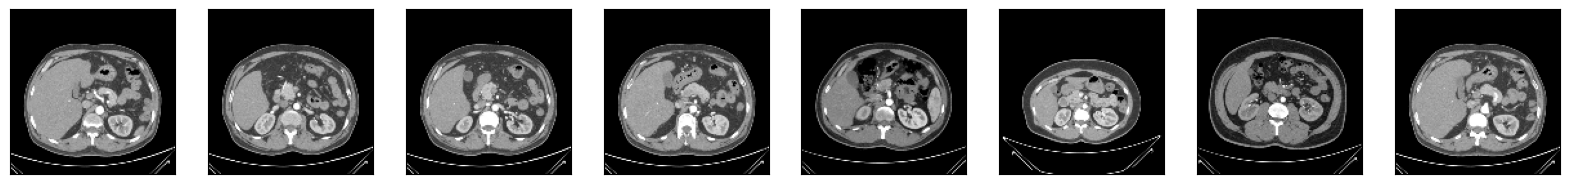

In [ ]:
kidney_images, kidney_labels = load_data(base_dir, image_size, 'KidneyNormal', 'KidneyTumor')
show_images(kidney_images)
kidney_images = kidney_images / 255.0

In [ ]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(kidney_images, kidney_labels, test_size=0.5, random_state=123)

Testing Brain Tumor trained model on Kidney Tumor data
* Performs poorly due to never seen features

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_k, y_test_k, verbose=2)
print(f"Brain Tumor Detection Test Accuracy: {test_accuracy * 100:.2f}%")

14/14 - 0s - 28ms/step - accuracy: 0.4430 - loss: 3.3636
Brain Tumor Detection Test Accuracy: 44.30%


Fine-tune the model

In [ ]:
# Model is now trainable
base_model.trainable = True

# Fine-tune the last 4 layers
fine_tune_at = len(base_model.layers) - 4

# Keep the base layer frozen
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Recompile the new changes

In [ ]:
tl_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Train with Kidney Tumor data
* Pre-trained layers are kept frozen
* New layers and classification layers are added

In [ ]:
history_kidney = tl_model.fit(datagen.flow(X_train_k, y_train_k, batch_size=32), epochs=3, validation_data=(X_test_k, y_test_k))

Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 281s 20s/step - accuracy: 0.7358 - loss: 0.5335 - val_accuracy: 0.9195 - val_loss: 0.1692
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 321s 21s/step - accuracy: 0.9664 - loss: 0.1049 - val_accuracy: 0.9978 - val_loss: 0.0133
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 322s 21s/step - accuracy: 1.0000 - loss: 0.0178 - val_accuracy: 1.0000 - val_loss: 0.0021


Get accuracy

In [ ]:
test_loss, test_accuracy = tl_model.evaluate(X_test_k, y_test_k, verbose=2)
print(f"Kidney Tumor Detection Test Accuracy: {test_accuracy * 100:.2f}%")

14/14 - 116s - 8s/step - accuracy: 1.0000 - loss: 0.0021
Kidney Tumor Detection Test Accuracy: 100.00%


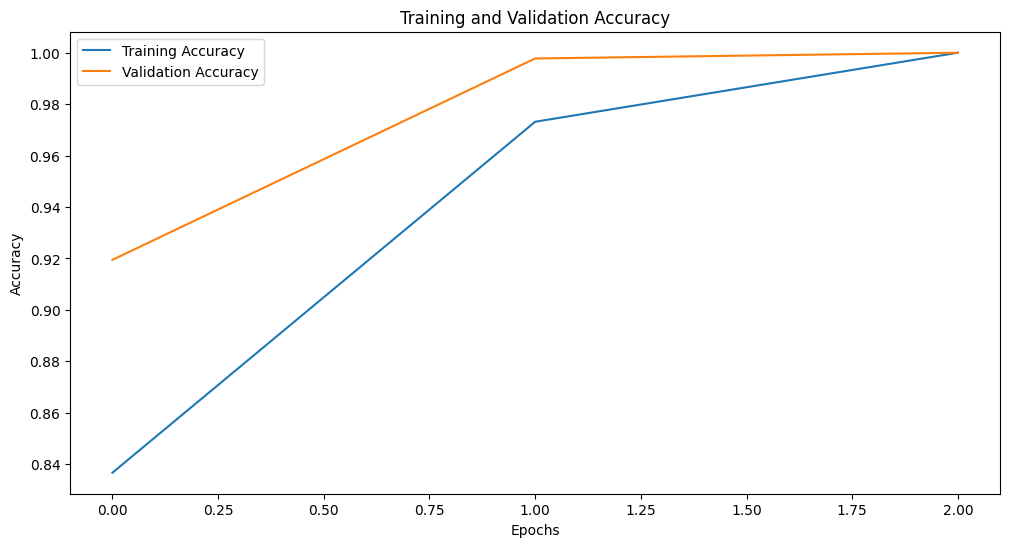

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history_kidney.history['accuracy'], label='Training Accuracy')
plt.plot(history_kidney.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print("Transfer Learning CNN Misclassified Images:")
display_misclassified(tl_model, X_test_k, y_test_k, "TL CNN", n=10)

Transfer Learning CNN Misclassified Images:


NameError: name 'display_misclassified' is not defined

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


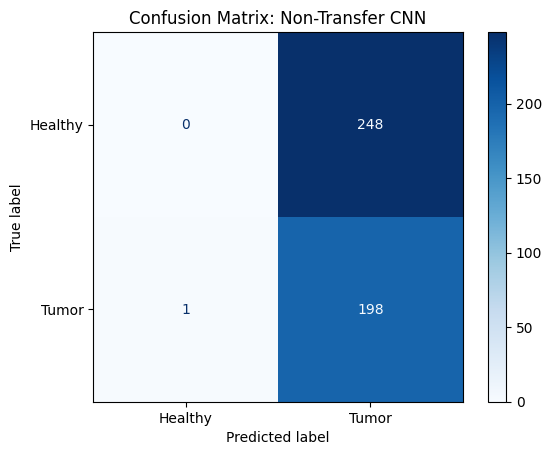

14/14 ━━━━━━━━━━━━━━━━━━━━ 118s 8s/step


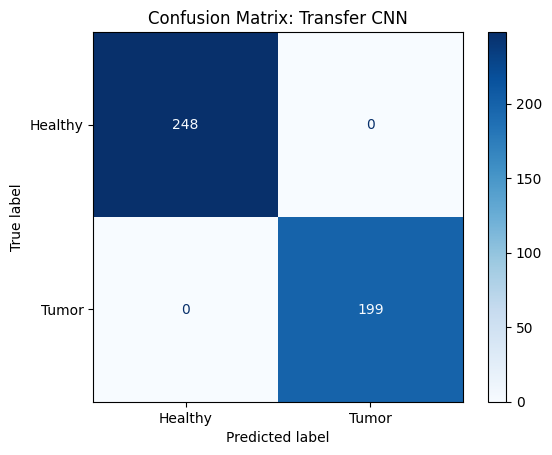

In [ ]:
plot_confusion_matrix(model, X_test_k, y_test_k, "Non-Transfer CNN")

plot_confusion_matrix(tl_model, X_test_k, y_test_k, "Transfer CNN")

# Final Results

### First Test
Convolutional Neural Network
* Test Accuracy: 93.00%
* [TN: 212, FP: 9, FN: 19, TP: 160]
>

Fully Connected Neural Network
* Test Accuracy: 88.50%
* [TN: 195, FP: 26, FN: 20, TP: 159]
>

Transfer Learning
* Non-Transfer Kidney Tumor Detection Test Accuracy: 44.30%
* [TN: 0, FP: 248, FN: 1, TP: 198]
>
* Transfer Kidney Tumor Detection Test Accuracy: 99.78%
* [TN: 248, FP: 0, FN: 1, TP: 198]

### Second Test
Convolutional Neural Network
* Test Accuracy: 92.00%
* [TN: 208, FP: 13, FN: 19, TP: 160]
>

Fully Connected Neural Network
* Test Accuracy: 80.75%
* [TN: 161, FP: 60, FN: 17, TP: 162]
>

Transfer Learning
* Non-Transfer Kidney Tumor Detection Test Accuracy: 44.30%
* [TN: 0, FP: 248, FN: 1, TP: 198]
>
* Transfer Kidney Tumor Detection Test Accuracy: 100.00%
* [TN: 248, FP: 0, FN: 0, TP: 199]